In [181]:
!pip install tf_keras

In [182]:
# import TensorFlow
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)


2.15.0


In [183]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'


import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler


In [235]:
df = pd.read_csv("/content/Admission_Predict_A3.csv")

In [239]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Linear Regression

Epoch 100, Loss: 0.5168789625167847
Epoch 200, Loss: 0.16700220108032227
Epoch 300, Loss: 0.0667397528886795
Epoch 400, Loss: 0.031196724623441696
Epoch 500, Loss: 0.016718585044145584
Epoch 600, Loss: 0.010168764740228653
Epoch 700, Loss: 0.006971181835979223
Epoch 800, Loss: 0.005326384212821722
Epoch 900, Loss: 0.00445073377341032
Epoch 1000, Loss: 0.003974161576479673
Mean Squared Error (MSE): 0.004891734570264816


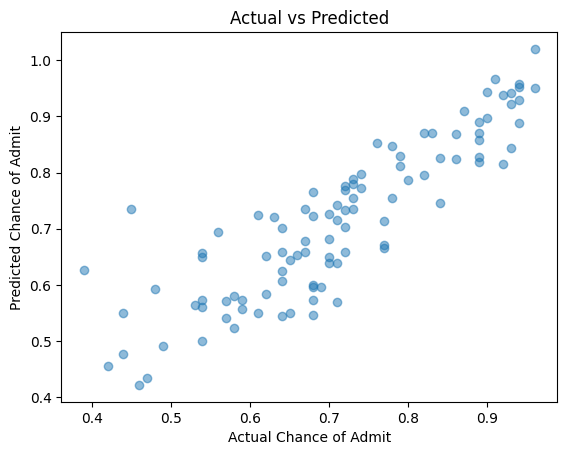

In [291]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.reshape(-1, 1), test_size=0.2, random_state=42)

# Convert data into TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

# Initialize weights and bias as TensorFlow variables
num_features = X_train.shape[1]
W = tf.Variable(tf.random.normal(shape=(num_features, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

# Define linear regression model
def linear_regression(X):
    return tf.matmul(X, W) + b

# Define the loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# SGD optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.numpy()}')

# Evaluation
y_pred_test = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test_tensor, y_pred_test).numpy()
print(f'Mean Squared Error (MSE): {mse}')

# Plotting actual vs predicted
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted')
plt.show()


# Logistic Regression

In [198]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Load data into a Pandas DataFrame
df = pd.read_csv('/content/Admission_Predict_A3.csv')


In [199]:
# Binning process
bins = [0, 0.33, 0.67, 1.0]
labels = ['low', 'medium', 'high']
df['Chance of Admit '] = pd.cut(df['Chance of Admit '], bins=bins, labels=labels)

# Separate features and target
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [200]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [201]:
# Convert data into TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

# Define logistic regression model
num_classes = len(labels)
num_features = X.shape[1]
W = tf.Variable(tf.random.normal(shape=(num_features, num_classes)))
b = tf.Variable(tf.zeros(shape=(num_classes,)))

def logistic_regression(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

# Define the loss function
def cross_entropy_loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# SGD optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)


Tried different learning rates for stochastic gradient descent 0.6 and


In [202]:

optimizer = tf.optimizers.SGD(learning_rate=0.6)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(X_train_tensor)
        loss = cross_entropy_loss(y_train_tensor, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    losses.append(loss)
    print(f'Epoch {epoch+1}, Loss: {loss.numpy()}')


Epoch 1, Loss: 1.1753062009811401
Epoch 2, Loss: 1.1484081745147705
Epoch 3, Loss: 1.1135711669921875
Epoch 4, Loss: 1.0691399574279785
Epoch 5, Loss: 1.0185787677764893
Epoch 6, Loss: 0.9730603098869324
Epoch 7, Loss: 0.9400354027748108
Epoch 8, Loss: 0.9170277118682861
Epoch 9, Loss: 0.9001310467720032
Epoch 10, Loss: 0.887022078037262
Epoch 11, Loss: 0.8764164447784424
Epoch 12, Loss: 0.8675611615180969
Epoch 13, Loss: 0.8599851727485657
Epoch 14, Loss: 0.8533774018287659
Epoch 15, Loss: 0.8475239276885986
Epoch 16, Loss: 0.8422734141349792
Epoch 17, Loss: 0.8375162482261658
Epoch 18, Loss: 0.8331720232963562
Epoch 19, Loss: 0.8291804790496826
Epoch 20, Loss: 0.8254957795143127
Epoch 21, Loss: 0.82208251953125
Epoch 22, Loss: 0.818911612033844
Epoch 23, Loss: 0.8159591555595398
Epoch 24, Loss: 0.8132044076919556
Epoch 25, Loss: 0.8106292486190796
Epoch 26, Loss: 0.8082169890403748
Epoch 27, Loss: 0.8059532642364502
Epoch 28, Loss: 0.8038244843482971
Epoch 29, Loss: 0.801818668842315

In [203]:
# Evaluation
y_pred_test = logistic_regression(X_test_tensor)
y_pred_labels = tf.argmax(y_pred_test, axis=1)
accuracy = np.mean(y_pred_labels.numpy() == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.77


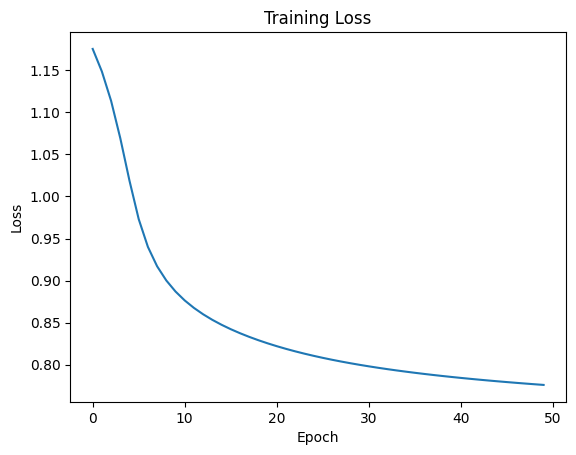

In [204]:
# Plot loss over epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Additional Tasks

In [205]:
df = pd.read_csv('/content/Admission_Predict_A3.csv')

<ipython-input-206-72d3f1633b69>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")


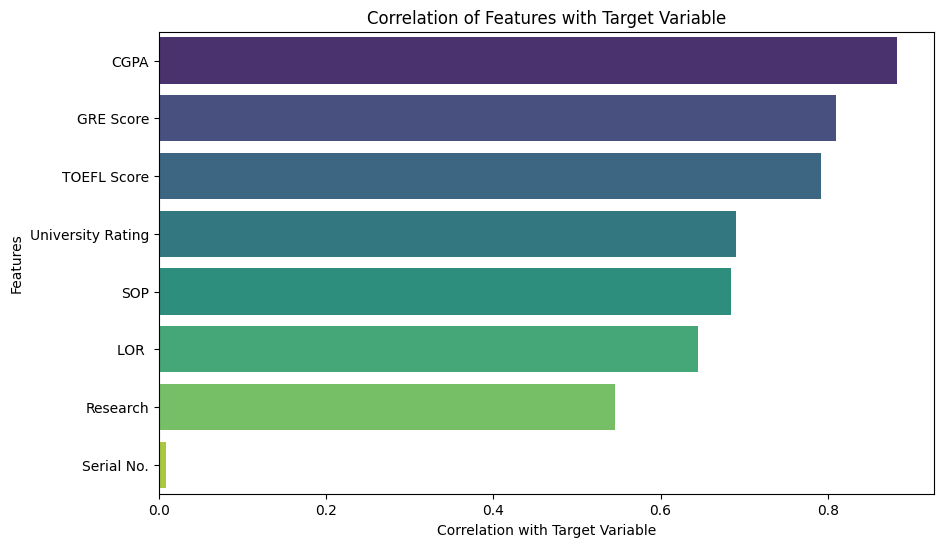

In [206]:
import seaborn as sns
chance = df.columns[8]
# Assuming df is your DataFrame containing all variables including the target
correlation_matrix = df.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix[chance]

# Remove the target variable itself from the correlation list
correlation_with_target = correlation_with_target.drop(chance)

# Sort correlations in descending order
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.xlabel('Correlation with Target Variable')
plt.ylabel('Features')
plt.title('Correlation of Features with Target Variable')
plt.show()

Comparative Analysis

In [207]:
df = pd.read_csv('/content/Admission_Predict_A3.csv')

In [208]:
X = df.drop(["Serial No.", "Chance of Admit "], axis=1)
y = df["Chance of Admit "]

In [209]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [210]:
X_tensor = tf.constant(X_scaled, dtype=tf.float32)
y_tensor = tf.constant(y.values, dtype=tf.float32)

In [211]:
X_numpy = X_tensor.numpy()
y_numpy = y_tensor.numpy()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

In [213]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linear_regression(X_train, y_train, X_test, y_test, learning_rate):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

mse_results = []
for lr in learning_rates:
    mse = train_linear_regression(X_train, y_train, X_test, y_test, learning_rate=lr)
    mse_results.append(mse)


In [214]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score

In [215]:
kf_linear = KFold(n_splits=5, shuffle=True, random_state=42)
linear_reg_mse_cv = []

In [216]:
for train_index, test_index in kf_linear.split(X_numpy):
    X_train_cv, X_test_cv = X_numpy[train_index], X_numpy[test_index]
    y_train_cv, y_test_cv = y_numpy[train_index], y_numpy[test_index]

    mse_cv = train_linear_regression(X_train_cv, y_train_cv, X_test_cv, y_test_cv, learning_rate=0.01)
    linear_reg_mse_cv.append(mse_cv)

In [217]:
kf_logistic = KFold(n_splits=5, shuffle=True, random_state=42)
logistic_reg_accuracy_cv = []

In [218]:
# Function to binarize the target variable
def binarize_target(y, threshold):
    return np.where(y > threshold, 1.0, 0.0)

In [219]:
def train_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, epochs, threshold):
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
    bias = tf.Variable(tf.zeros(shape=(1,)))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = tf.nn.sigmoid(tf.matmul(X_train, weights) + bias)
            loss = tf.reduce_mean(-y_train * tf.math.log(y_pred) - (1 - y_train) * tf.math.log(1 - y_pred))

        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

    # Make predictions on the test set
    y_pred_proba = tf.nn.sigmoid(tf.matmul(X_test, weights) + bias)
    y_pred_binary = tf.where(y_pred_proba > threshold, 1.0, 0.0)

    return accuracy_score(y_test, y_pred_binary)

In [220]:
# Perform logistic regression with varying hyperparameters
learning_rates_logistic = [0.001, 0.01, 0.1]
epochs_logistic = 50
threshold_values = [0.3, 0.5, 0.7]

In [221]:
# Store results for comparison
results = []

# k-fold cross-validation for logistic regression
kf_logistic_comparison = KFold(n_splits=5, shuffle=True, random_state=42)


In [222]:
for lr in learning_rates_logistic:
    for threshold_value in threshold_values:
        logistic_reg_accuracy_cv = []

        for train_index, test_index in kf_logistic_comparison.split(X_numpy):
            X_train_cv, X_test_cv = X_numpy[train_index], X_numpy[test_index]
            y_train_cv, y_test_cv = y_numpy[train_index], y_numpy[test_index]

            # Binarize the target variable
            y_train_cv_binarized = binarize_target(y_train_cv, threshold_value)
            y_test_cv_binarized = binarize_target(y_test_cv, threshold_value)

            accuracy_cv = train_logistic_regression(
                X_train_cv, y_train_cv_binarized, X_test_cv, y_test_cv_binarized,
                learning_rate=lr, epochs=epochs_logistic, threshold=0.5
            )

            logistic_reg_accuracy_cv.append(accuracy_cv)

        # Calculate mean accuracy for the current set of hyperparameters
        mean_accuracy = np.mean(logistic_reg_accuracy_cv)
        results.append((lr, epochs_logistic, threshold_value, mean_accuracy))

In [223]:
# Display the results
print("\nComparative Analysis:")
print("{:<15} {:<15} {:<15} {:<15}".format('Learning Rate', 'Epochs', 'Threshold', 'Mean Accuracy'))
print("-" * 60)

for result in results:
    lr, epochs_logistic, threshold_value, mean_accuracy = result
    print("{:<15} {:<15} {:<15} {:<15}".format(lr, epochs_logistic, threshold_value, mean_accuracy))


Comparative Analysis:
Learning Rate   Epochs          Threshold       Mean Accuracy  
------------------------------------------------------------
0.001           50              0.3             0.526          
0.001           50              0.5             0.49000000000000005
0.001           50              0.7             0.48200000000000004
0.01            50              0.3             0.5199999999999999
0.01            50              0.5             0.5559999999999999
0.01            50              0.7             0.458          
0.1             50              0.3             0.9460000000000001
0.1             50              0.5             0.808          
0.1             50              0.7             0.536          
